In [6]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [9]:
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

http://api.openweathermap.org/data/2.5/weather?appid=e83a82b4cd538ee3e2aa677aad75744a&units=metric&q=Paris
http://api.openweathermap.org/data/2.5/weather?appid=e83a82b4cd538ee3e2aa677aad75744a&units=metric&q=London
http://api.openweathermap.org/data/2.5/weather?appid=e83a82b4cd538ee3e2aa677aad75744a&units=metric&q=Oslo
http://api.openweathermap.org/data/2.5/weather?appid=e83a82b4cd538ee3e2aa677aad75744a&units=metric&q=Beijing
http://api.openweathermap.org/data/2.5/weather?appid=e83a82b4cd538ee3e2aa677aad75744a&units=metric&q=Mumbai
http://api.openweathermap.org/data/2.5/weather?appid=e83a82b4cd538ee3e2aa677aad75744a&units=metric&q=Manila
http://api.openweathermap.org/data/2.5/weather?appid=e83a82b4cd538ee3e2aa677aad75744a&units=metric&q=New York
http://api.openweathermap.org/data/2.5/weather?appid=e83a82b4cd538ee3e2aa677aad75744a&units=metric&q=Seattle
http://api.openweathermap.org/data/2.5/weather?appid=e83a82b4cd538ee3e2aa677aad75744a&units=metric&q=Dallas
http://api.openweathermap.o

In [25]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.85,10.99
1,London,51.51,12.99
2,Oslo,59.91,8.17
3,Beijing,39.91,27.11
4,Mumbai,19.01,28.00
5,Manila,14.60,30.80
6,New York,40.71,28.68
7,Seattle,47.61,15.84
8,Dallas,32.77,31.57
9,Taipei,25.05,28.45


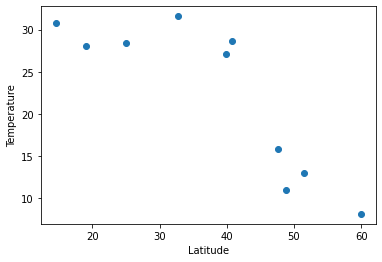

In [26]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [27]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    16.637411
1    15.259858
2    10.909693
3    21.267230
4    32.090856
5    34.374693
6    20.852929
7    17.279578
8    24.964871
9    28.962880
Name: lat, dtype: float64


In [28]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.52x +41.94


The r-squared is: 0.7121088310834942


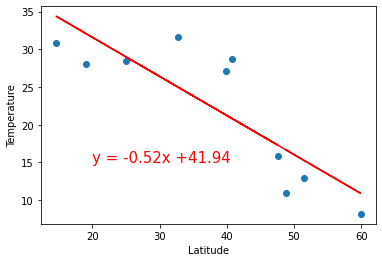

In [29]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

In [30]:
# Calculate the temperature for Florence at 43.77 degrees
florence_lat = 43.77
florence_predicted_temp = round(slope * florence_lat + intercept,2)
                                
print(f"The Predicted temperature for Florence will be {florence_predicted_temp}.")

The Predicted temperature for Florence will be 19.27.


In [31]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
florence_actual_temp = response['main']['temp']

print(f"The actual temperature of Florence is {florence_actual_temp}")

The actual temperature of Florence is 14.68
